# Visualización de datos
Para hoy
* pq visualizar con pyhton
* librerias matplotlib
* Visualizando datos


Un analisis visual nos permite saber e intuir como se van a comportar los datos, o como se han comportado
la forma clasica para usar visualización de datos es con matplotlib 

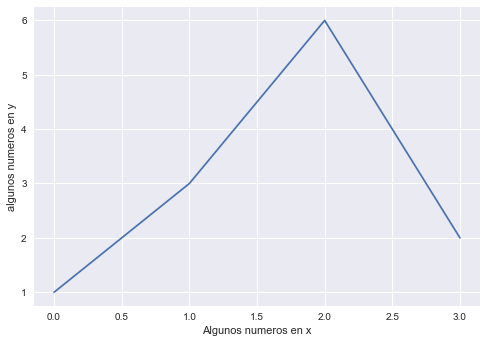

In [2]:
from matplotlib import pyplot as plt 
plt.style.use('seaborn')
plt.plot([1,3,6,2])
plt.ylabel('algunos numeros en y')
plt.xlabel('Algunos numeros en x')
plt.show()

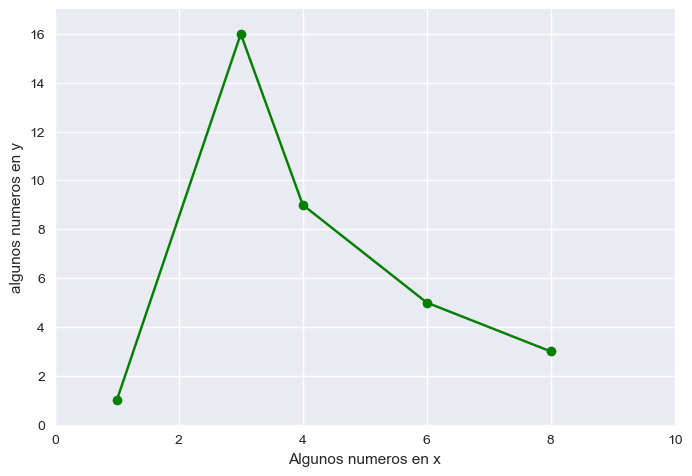

In [3]:
plt.figure(dpi=100) #muestra el tamaño
plt.plot([1,3,4,6,8],[1,16,9,5,3],'go-') #primera letra, color, segunda letra puntitos, el - es la linea
plt.axis([0,10,0,17]) #[min ejex, max ejex, min ejey, max ejey]
plt.ylabel('algunos numeros en y')
plt.xlabel('Algunos numeros en x')
plt.show()

ejercicio:
Crear una grafica con valores aleatorios (10) de forma senoideal


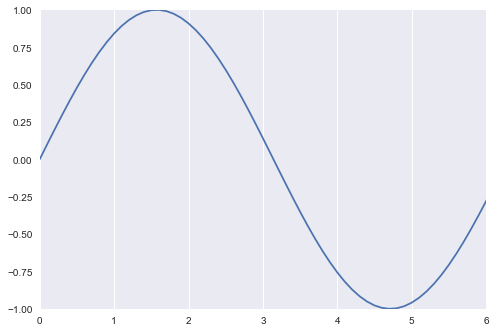

In [4]:
from numpy import sin,arange,pi
x=arange(0.0,2*pi,0.1)
y=sin(x)
plt.plot(x,y)
plt.grid(axis='y')
plt.axis([0,6,-1,1])
plt.show()

In [5]:
import pandas as pd

In [6]:
filename_ejercicio="/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_2/Data/driver_standings.csv"
f1_driver_standing_df=pd.read_csv(filename_ejercicio)
f1_driver_standing_df


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33430,71197,87,42,2.0,22,22,0
33431,71223,88,38,0.0,25,25,0
33432,71224,88,42,2.0,22,22,0
33433,71250,89,38,0.0,25,25,0


In [7]:
dfx=f1_driver_standing_df.groupby(['driverId'])[['wins']].sum().sort_values(by='wins',ascending=False)
dfx

,wins
driverId,
1,1019
30,849
20,517
117,472
102,394
...,...
329,0
330,0
331,0


In [8]:
dfx.index

Int64Index([  1,  30,  20, 117, 102,   4,   3,  95, 182, 830,
            ...
            322, 323, 324, 325, 326, 329, 330, 331, 332, 855],
           dtype='int64', name='driverId', length=847)

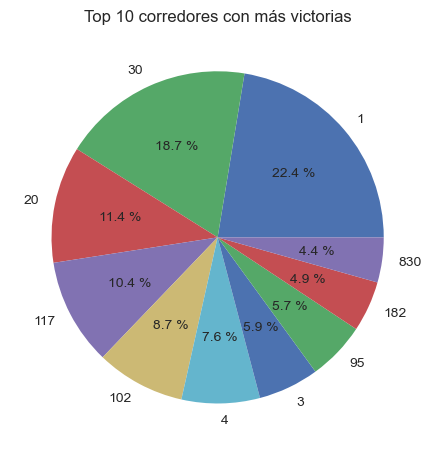

In [9]:
plt.figure(dpi=100)
plt.pie(dfx['wins'].head(10), labels=dfx.index[0:10],autopct="%0.1f %%")
plt.title('Top 10 corredores con más victorias')
plt.show()

comportamiento de un equipo y sus victorias durante el tiempo(6 graficos)
limpiar los NaN
que cada grafico tegna un filtro de tiempo distinto


In [10]:
filename='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_3/Data/EPL_Set.csv'
data_EPL=pd.read_csv(filename)
data_EPL

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18


Limpieza

In [11]:
del data_EPL['HTHG'],data_EPL['HTAG'],data_EPL['HTR']

Dummies

In [12]:
dummie=pd.get_dummies(data=data_EPL, columns = ["FTR"])
dummie.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Season,FTR_A,FTR_D,FTR_H
0,E0,14/08/93,Arsenal,Coventry,0,3,1993-94,1,0,0
1,E0,14/08/93,Aston Villa,QPR,4,1,1993-94,0,0,1
2,E0,14/08/93,Chelsea,Blackburn,1,2,1993-94,1,0,0
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,1993-94,0,0,1
4,E0,14/08/93,Man City,Leeds,1,1,1993-94,0,1,0


filtros de tiempo

In [13]:
data_EPL['Date'] = pd.to_datetime(data_EPL['Date'])

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/08/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/08/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/08/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/matiasinostrozacifuentes/op

In [14]:
data_EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       9664 non-null   object        
 1   Date      9664 non-null   datetime64[ns]
 2   HomeTeam  9664 non-null   object        
 3   AwayTeam  9664 non-null   object        
 4   FTHG      9664 non-null   int64         
 5   FTAG      9664 non-null   int64         
 6   FTR       9664 non-null   object        
 7   Season    9664 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 604.1+ KB


In [15]:
Fecha_filtrada_in_1=data_EPL['Date']>='14/08/93'
Fecha_filtrada_out_1=data_EPL['Date']<'01/01/98'
df2=data_EPL.loc[Fecha_filtrada_in_1 & Fecha_filtrada_out_1 , :]
df2

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season
0,E0,1993-08-14,Arsenal,Coventry,0,3,A,1993-94
1,E0,1993-08-14,Aston Villa,QPR,4,1,H,1993-94
2,E0,1993-08-14,Chelsea,Blackburn,1,2,A,1993-94
3,E0,1993-08-14,Liverpool,Sheffield Weds,2,0,H,1993-94
4,E0,1993-08-14,Man City,Leeds,1,1,D,1993-94
...,...,...,...,...,...,...,...,...
1887,E0,1997-12-28,Leicester,Sheffield Weds,1,1,D,1997-98
1888,E0,1997-12-28,Newcastle,Liverpool,1,2,A,1997-98
1889,E0,1997-12-28,Tottenham,Arsenal,1,1,D,1997-98
1890,E0,1997-12-28,Wimbledon,West Ham,1,2,A,1997-98


Filtro de equipos

In [16]:
equipos=['Arsenal','Aston Villa','Chelsea','Liverpool','Man City','Tottenham']
equipos_filtrados1=data_EPL['HomeTeam']=='Arsenal'
equipos_filtrados2=data_EPL['HomeTeam']=='Aston Villa'
equipos_filtrados3=data_EPL['HomeTeam']==equipos[2]
equipos_filtrados4=data_EPL['HomeTeam']==equipos[3]
equipos_filtrados5=data_EPL['HomeTeam']==equipos[4]
equipos_filtrados6=data_EPL['HomeTeam']==equipos[5]

df_equipos=data_EPL.loc[equipos_filtrados1 | equipos_filtrados2 | equipos_filtrados3|equipos_filtrados4|equipos_filtrados5 | equipos_filtrados6 , :]

In [17]:
primera_fecha=df_equipos.loc[df_equipos['Date']<='01/01/98',:]
primera_fecha

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season
0,E0,1993-08-14,Arsenal,Coventry,0,3,A,1993-94
1,E0,1993-08-14,Aston Villa,QPR,4,1,H,1993-94
2,E0,1993-08-14,Chelsea,Blackburn,1,2,A,1993-94
3,E0,1993-08-14,Liverpool,Sheffield Weds,2,0,H,1993-94
4,E0,1993-08-14,Man City,Leeds,1,1,D,1993-94
...,...,...,...,...,...,...,...,...
1872,E0,1997-12-26,Arsenal,Leicester,2,1,H,1997-98
1873,E0,1997-12-26,Aston Villa,Tottenham,4,1,H,1997-98
1875,E0,1997-12-26,Chelsea,Wimbledon,1,1,D,1997-98
1878,E0,1997-12-26,Liverpool,Leeds,3,1,H,1997-98


<function matplotlib.pyplot.show(close=None, block=None)>

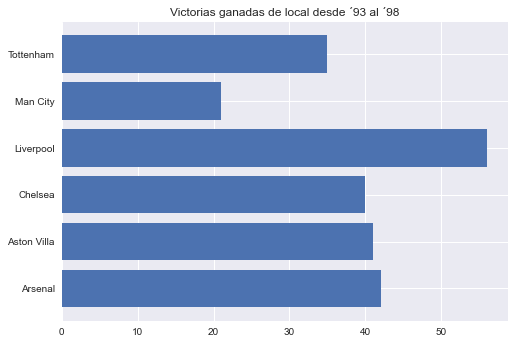

In [18]:
dummie=pd.get_dummies(data=primera_fecha, columns = ["FTR"])
Cualquiera=dummie.groupby(['HomeTeam'])[['FTR_H']].sum()
x=Cualquiera.index
y=Cualquiera['FTR_H']
plt.barh(Cualquiera.index,y)
plt.title('Victorias ganadas de local desde ´93 al ´98')
plt.show

In [19]:
segunda_fecha=df_equipos.loc[(df_equipos['Date']>'01/01/98') & (df_equipos['Date']<='01/01/03')  ,:]
segunda_fecha

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season
1892,E0,1998-10-01,Arsenal,Leeds,2,1,H,1997-98
1893,E0,1998-10-01,Aston Villa,Leicester,1,1,D,1997-98
1895,E0,1998-10-01,Chelsea,Coventry,3,1,H,1997-98
1897,E0,1998-10-01,Liverpool,Wimbledon,2,0,H,1997-98
1908,E0,1998-01-17,Tottenham,West Ham,1,0,H,1997-98
...,...,...,...,...,...,...,...,...
3780,E0,2002-12-26,Tottenham,Charlton,2,2,D,2002-03
3783,E0,2002-12-28,Aston Villa,Middlesboro,1,0,H,2002-03
3791,E0,2002-12-29,Arsenal,Liverpool,1,1,D,2002-03
3793,E0,2003-01-01,Arsenal,Chelsea,3,2,H,2002-03


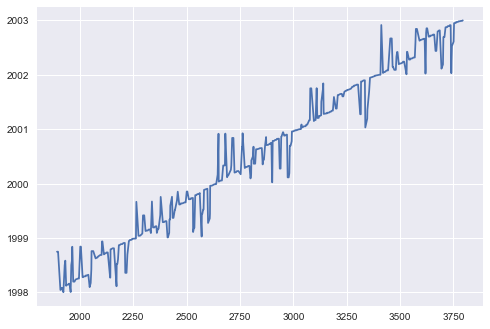

In [20]:
segunda_fecha.groupby(['HomeTeam'])[[]]
plt.plot(segunda_fecha['Date'],)
plt.show()

In [21]:
! pip install plotly.express

In [22]:
import plotly_express as pol

In [23]:
segunda_fecha['HomeTeam'].unique()

array(['Arsenal', 'Aston Villa', 'Chelsea', 'Liverpool', 'Tottenham',
       'Man City'], dtype=object)

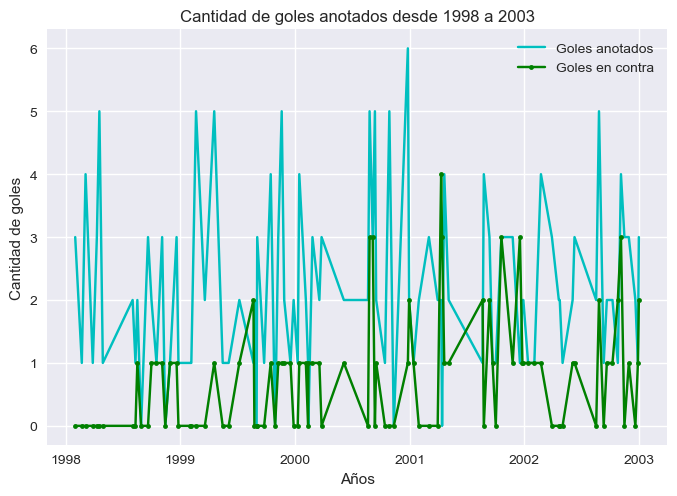

In [37]:
Arsenal=segunda_fecha.loc[segunda_fecha['HomeTeam']=='Arsenal',:]
Arsenal=Arsenal.sort_values(by='Date')
s=arange(3,3)
plt.figure(dpi=100)
plt.plot(Arsenal['Date'],Arsenal['FTHG'],'c-',Arsenal['Date'],Arsenal['FTAG'],'g.-')

plt.title('Cantidad de goles anotados desde 1998 a 2003')
plt.legend(['Goles anotados','Goles en contra'])
plt.xlabel('Años')
plt.ylabel('Cantidad de goles')
plt.show()



In [25]:
Arsenal['FTR'].value_counts()

H    74
D    16
A     7
Name: FTR, dtype: int64

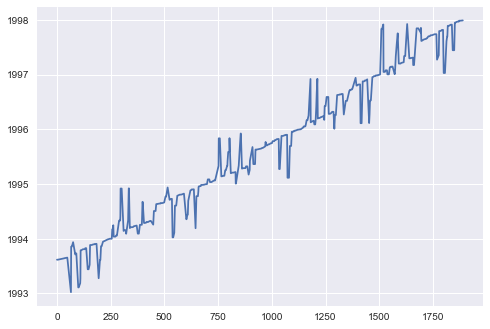

In [26]:
dummie=pd.get_dummies(data=primera_fecha, columns = ["FTR"])
plt.plot(dummie['Date'],)
